<a href="https://colab.research.google.com/github/ashuhitman/AndroidProjects/blob/master/DataAug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install -U albumentations

In [ ]:
from PIL import Image
import time
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import transforms
import albumentations
import albumentations.pytorch
from matplotlib import pyplot as plt
import cv2
import numpy as np
import os

In [ ]:
class FuseImageDataset(Dataset):
  def __init__(self,root_dir, transform = None):
    self.image_files = os.listdir(root_dir)
  def __len__(self):
    return len(image_files)
  def __getitem__(self,index):
    img_path = os.path.join(self.root_dir,image_files[index])
    img = Image.open(img_path)
    if self.transform:
      img = self.transform(img)
    return img
       


In [ ]:
root_dir = "/content/fuseing/"
dataset = FuseImageDataset(root_dir,transform)
len(root_dir)

17

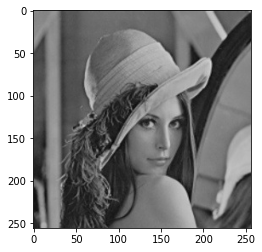

In [ ]:
# Declare an augmentation pipeline
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.VerticalFlip(),
    A.Rotate(limit=40,p=0.9),
    A.RGBShift(r_shift_limit=25,g_shift_limit=25,b_shift_limit=25,p=0.9)
])

# Read an image with OpenCV and convert it to the RGB colorspace
image = cv2.imread("/content/Original-image-256x256-pixels.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Augment an image
transformed = transform(image=image)
transformed_image = transformed["image"]
plt.imshow(transformed_image)

In [ ]:
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.VerticalFlip(),
    A.Rotate(limit=40,p=0.9),
    # A.RGBShift(r_shift_limit=25,g_shift_limit=25,b_shift_limit=25,p=0.9)
])
output_dir = "/content/fuseing"
img = cv2.imread("/content/fuseing/Original-image-256x256-pixels.png")
for i in range(15):
  augmentations = transform(image=img)
  augmented_img = augmentations["image"]
  plt.figure()
  plt.imshow(augmented_img)
  path = os.path.join(output_dir,str(i)+".png")
  cv2.imwrite(path,augmented_img)

In [ ]:
import os
import cv2
import albumentations as A
input_dir = "/content/fuseing/"
output_dir = "/content/fuseing/"
img_files = os.listdir(input_dir)
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.VerticalFlip(),
    A.Rotate(limit=40,p=0.9),
    # A.RGBShift(r_shift_limit=25,g_shift_limit=25,b_shift_limit=25,p=0.9)
])
for file in img_files:
  for i in range(15):
    img_path = os.path.join(input_dir,file)
    if img_path.endswith(".png") or img_path.endswith(".bmp") or img_path.endswith(".jpg") or img_path.endswith(".jpeg")  :
      print(img_path)
      img_path = os.path.join(input_dir,file)
      img = cv2.imread(img_path,cv2.COLOR_BGR2RGB)
      augmentations=transform(image=img)
      augmented_img=augmentations["image"]
      filename = os.path.splitext(file)[0]
      out_path = os.path.join(output_dir,filename+str(i)+".png")
      cv2.imwrite(out_path,augmented_img)
      plt.imshow(img)
   

In [ ]:
## Data Augmenation for eeg image
import os
import cv2
import albumentations as A
img_files = os.listdir(input_dir)
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.VerticalFlip(),
    A.Rotate(limit=40,p=0.9),
    # A.RGBShift(r_shift_limit=25,g_shift_limit=25,b_shift_limit=25,p=0.9)
])
augmented_images = []
for img in images:
  augs = []
  for i in range(4):
    augmentations=transform(image=img)
    augmented_img=augmentations["image"]
    augs.push(augmented_img)
  augmented_img.push(img,augs[0],augs[1],augs[1],augs[2],augs[3])
